![Python](https://img.shields.io/badge/python-3.9-blue)
![Status: Pending Migration](https://img.shields.io/badge/status-pending%20migration-orange)

<a id="table-of-contents"></a>
# 📖 Neural Networks

- [🧠 Introduction to Neural Networks](#introduction-to-neural-networks)
    - [🔑 What is a Neural Network?](#what-is-a-neural-network)
    - [🎯 Why Neural Networks? (vs. Traditional ML)](#why-neural-networks-vs-traditional-ml)

- [🔧 Setup Problem and Dataset](#setup-problem-and-dataset)
    - [📝 Define a Binary Classification Problem](#define-a-binary-classification-problem)
    - [📊 Visualize the Dataset](#visualize-the-dataset)
    - [💡 Define Model Input/Output](#define-model-input-output)

- [🛠️ Building a Neural Network](#building-a-neural-network)
    - [🔲 Neurons: Inputs, Weights, Biases, Activations](#neurons-and-activations)
    - [🔗 Layers and Architecture (Input, Hidden, Output)](#layers-and-architecture)
    - [🔄 Forward Propagation](#forward-propagation)
    - [📝 Loss Functions](#loss-functions)
    - [🔁 Backpropagation (Chain Rule)](#backpropagation)
    - [🚀 Gradient Descent (SGD, Adam)](#gradient-descent)

- [🧪 Train & Evaluate the Model](#train-and-evaluate-the-model)
    - [📉 Visualize Training Loss](#visualize-training-loss)
    - [📈 Plot Decision Boundary](#plot-decision-boundary)

- [🔚 Closing Notes](#closing-notes)
    - [⚠️ Common Pitfalls](#common-pitfalls)
    - [🎯 Best Practices](#best-practices)
    - [🔮 What Next (Toward Deep Learning & Text)](#what-next)

___

<a id="introduction-to-neural-networks"></a>
# 🧠 Introduction to Neural Networks



<details><summary><strong>📖 Click to Expand</strong></summary>

This notebook is a **hands-on implementation** of a basic neural network from scratch.

You’ll learn how a neural network:
- Processes input data through layers
- Computes predictions via forward propagation
- Learns by minimizing a loss function
- Updates its parameters using backpropagation and gradient descent

🔍 This is not about real-world deployment or large models.  
It’s about **understanding the inner mechanics** that all modern models (including LLMs) are built on.

We'll use a small binary classification task (`make_moons`) and train a neural net **end-to-end**.

</details>

<a id="what-is-a-neural-network"></a>
#### 🔑 What is a Neural Network?



<details><summary><strong>📖 Click to Expand</strong></summary>

A **neural network** is a function approximator built from layers of interconnected units called **neurons**.  

Each neuron performs a simple weighted sum of its inputs, adds a bias, and applies a **non-linear activation**.  
Layers of such neurons can approximate complex functions.

The simplest neural network:
- Has an **input layer** (features)
- One or more **hidden layers** (intermediate transformations)
- An **output layer** (final prediction)

They are trained by:
1. **Forward propagation**: compute output
2. **Loss calculation**: measure how wrong the prediction is
3. **Backpropagation**: update weights via gradient descent

Neural networks power most of modern AI — from image recognition to language generation.

</details>

<a id="why-neural-networks-vs-traditional-ml"></a>
#### 🎯 Why Neural Networks? (vs. Traditional ML)



<details><summary><strong>📖 Click to Expand</strong></summary>

Traditional ML models like logistic regression, decision trees, or SVMs:
- Rely on **manually engineered features**
- Struggle with **non-linear boundaries** or high-dimensional data
- Don’t scale well for structured data like **images, audio, or text**

Neural networks, by contrast:
- **Learn hierarchical features** automatically from raw data
- Can approximate any function (given enough neurons/layers)
- Scale to millions of parameters and **power modern deep learning**

They are especially useful when:
- You want **end-to-end learning**
- You’re working with **structured or high-dimensional data**
- Traditional models hit a ceiling in accuracy or flexibility

📌 In this notebook, we’ll see how even a tiny neural net can outperform linear models on non-linear classification tasks like `make_moons`.

</details>


[Back to the top](#table-of-contents)
___


<a id="setup-problem-and-dataset"></a>
# 🔧 Setup Problem and Dataset



<a id="define-a-binary-classification-problem"></a>
#### 📝 Define a Binary Classification Problem

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Generate dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X
y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

<a id="visualize-the-dataset"></a>
#### 📊 Visualize the Dataset



<details><summary><strong>📖 Click to Expand</strong></summary>

Before training, it helps to **visualize the classification problem**.

Each point in `make_moons` belongs to one of two classes (0 or 1), arranged in two interleaving arcs.  
This non-linear shape makes it impossible for a straight-line decision boundary to separate them cleanly — a perfect case for neural networks to shine.

</details>


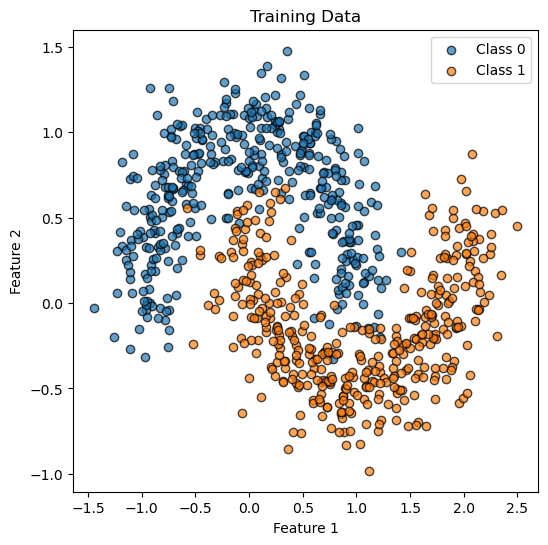

In [9]:
import matplotlib.pyplot as plt

# Plot the dataset
plt.figure(figsize=(6, 6))
for label, color in zip([0, 1], ['#1f77b4', '#ff7f0e']):
    plt.scatter(
        X_train[y_train == label, 0],
        X_train[y_train == label, 1],
        c=color,
        label=f"Class {label}",
        edgecolors='k',
        alpha=0.7
    )

plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show();


<a id="define-model-input-output"></a>
#### 💡 Define Model Input/Output



<details><summary><strong>📖 Click to Expand</strong></summary>

We're working with a **binary classification task**.

- **Inputs**: Each sample has 2 numerical features → shape `(n_samples, 2)`
- **Outputs**: Binary labels — either 0 or 1

Our model should:
- Take a 2D input vector
- Pass it through one or more layers
- Output a **single probability** (between 0 and 1)
- Use a **threshold** (e.g., 0.5) to classify as class 0 or 1

This implies:
- `Input dimension` = 2  
- `Output dimension` = 1 (with sigmoid activation)

</details>


In [10]:
# Input and output shape check
print("Input shape (X_train):", X_train.shape)
print("Output shape (y_train):", y_train.shape)


Input shape (X_train): (800, 2)
Output shape (y_train): (800,)


[Back to the top](#table-of-contents)
___


<a id="building-a-neural-network"></a>
# 🛠️ Building a Neural Network



<a id="neurons-and-activations"></a>
#### 🔲 Neurons: Inputs, Weights, Biases, Activations



<details><summary><strong>📖 Click to Expand</strong></summary>

A **neuron** is the fundamental unit of a neural network. It performs three steps:

1. Computes a **weighted sum** of its inputs:  
   $$
   z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
   $$

2. Applies a **non-linear activation function** to this sum:  
   $$
   a = \sigma(z)
   $$

3. Passes the output to the next layer or as final output

**Common activation functions:**

- **ReLU**:                                  
  $$\text{ReLU}(x) = \max(0, x)$$  
  Sparse, fast, and widely used for hidden layers.

- **Sigmoid**:  
  $$\text{Sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$  
  Outputs values between 0 and 1 — useful for binary classification outputs.

👉 In this notebook, we’ll use **ReLU for hidden layers**  
and **sigmoid for the output layer**.

</details>


In [12]:
import numpy as np

# Sample input with 2 features
x = np.array([0.5, -1.2])
print("Input vector (x):", x)

# Sample weights and bias
w = np.array([0.7, -0.3])
b = 0.1
print("Weights (w):", w)
print("Bias (b):", b)

# Activation functions
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 1: Weighted sum (z)
z = np.dot(w, x) + b
print("Weighted sum (z = w·x + b):", z)

# Step 2: Activation
a = relu(z)
print("Activated output (ReLU applied):", a);


Input vector (x): [ 0.5 -1.2]
Weights (w): [ 0.7 -0.3]
Bias (b): 0.1
Weighted sum (z = w·x + b): 0.8099999999999999
Activated output (ReLU applied): 0.8099999999999999


<a id="layers-and-architecture"></a>
#### 🔗 Layers and Architecture (Input, Hidden, Output)



<details><summary><strong>📖 Click to Expand</strong></summary>

Neural networks are built by stacking **layers of neurons**.

- The **input layer** receives raw feature values (e.g., 2 features per sample)
- One or more **hidden layers** transform inputs using weights, biases, and activations
- The **output layer** produces the final prediction (e.g., a probability between 0 and 1)

Each layer computes the following:
$$
a^{[l]} = \sigma(W^{[l]} \cdot a^{[l-1]} + b^{[l]})
$$

Where:
- $a^{[l-1]}$ is the output from the previous layer (or the input vector if $l=1$)  
- $W^{[l]}$ and $b^{[l]}$ are the weight matrix and bias vector for layer $l$  
- $\sigma$ is the activation function (e.g., ReLU or sigmoid)

You can think of a neural network as a **function composed of functions**, where each layer applies a transformation to the previous output.

</details>


In [13]:
# Toy input sample (2 features)
x_toy = np.array([0.6, -1.1])

# Toy layer weights and biases
W1_toy = np.array([[0.4, -0.6],
                   [0.1,  0.8]])
b1_toy = np.array([0.0, 0.2])

W2_toy = np.array([[0.5, -0.9]])
b2_toy = np.array([0.1])

# Forward pass through toy 2-layer net
z1_toy = np.dot(W1_toy, x_toy) + b1_toy
a1_toy = relu(z1_toy)

z2_toy = np.dot(W2_toy, a1_toy) + b2_toy
a2_toy = sigmoid(z2_toy)

print("Hidden layer output (a1):", a1_toy)
print("Final output (a2):", a2_toy);


Hidden layer output (a1): [0.9 0. ]
Final output (a2): [0.63413559]


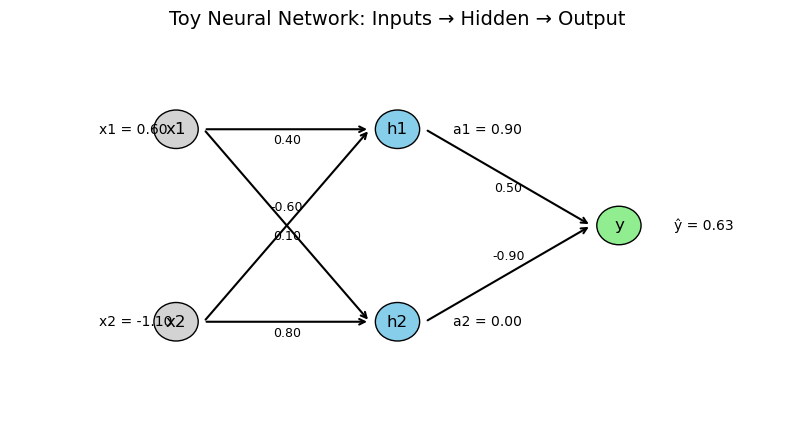

In [19]:
def draw_labeled_net(x, W1, b1, W2, b2, a1, a2):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off')

    coords = {
        'x1': (0, 1), 'x2': (0, -1),
        'h1': (2, 1), 'h2': (2, -1),
        'y': (4, 0)
    }

    # Draw nodes
    for name, (x_coord, y_coord) in coords.items():
        color = 'lightgray' if name.startswith('x') else ('skyblue' if name.startswith('h') else 'lightgreen')
        circle = plt.Circle((x_coord, y_coord), 0.2, color=color, ec='black', zorder=2)
        ax.add_artist(circle)
        ax.text(x_coord, y_coord, name, fontsize=12, ha='center', va='center', zorder=3)

    # Draw edges with weights
    for i, xi in enumerate(['x1', 'x2']):
        for j, hj in enumerate(['h1', 'h2']):
            x0, y0 = coords[xi]
            x1, y1 = coords[hj]
            weight = W1[j, i]
            ax.annotate('', xy=(x1-0.25, y1), xytext=(x0+0.25, y0),
                        arrowprops=dict(arrowstyle='->', lw=1.5))
            label_offset = 0.15 if y1 > y0 else -0.15
            ax.text((x0+x1)/2, (y0+y1)/2 + label_offset, f'{weight:.2f}', fontsize=9, ha='center')

    for j, hj in enumerate(['h1', 'h2']):
        x0, y0 = coords[hj]
        x1, y1 = coords['y']
        weight = W2[0, j]
        ax.annotate('', xy=(x1-0.25, y1), xytext=(x0+0.25, y0),
                    arrowprops=dict(arrowstyle='->', lw=1.5))
        label_offset = 0.15 if y1 > y0 else -0.15
        ax.text((x0+x1)/2, (y0+y1)/2 + label_offset, f'{weight:.2f}', fontsize=9, ha='center')

    # Value labels — nudged away from node centers
    ax.text(-0.7, 1, f"x1 = {x[0]:.2f}", fontsize=10, ha='left', va='center')
    ax.text(-0.7, -1, f"x2 = {x[1]:.2f}", fontsize=10, ha='left', va='center')
    ax.text(2.5, 1, f"a1 = {a1[0]:.2f}", fontsize=10, ha='left', va='center')
    ax.text(2.5, -1, f"a2 = {a1[1]:.2f}", fontsize=10, ha='left', va='center')
    ax.text(4.5, 0, f"ŷ = {a2[0]:.2f}", fontsize=10, ha='left', va='center')

    plt.title("Toy Neural Network: Inputs → Hidden → Output", fontsize=14)
    plt.xlim(-1.5, 5.5)
    plt.ylim(-2, 2)
    plt.show();

# Run it again with same toy values
draw_labeled_net(x_toy, W1_toy, b1_toy, W2_toy, b2_toy, a1_toy, a2_toy)


<a id="forward-propagation"></a>
#### 🔄 Forward Propagation



<details><summary><strong>📖 Click to Expand</strong></summary>

**Forward propagation** is the process of computing the output of a neural network given an input.

It flows from input layer → hidden layers → output layer:

For each layer:
- Compute the **weighted sum**:  
  $$
  z^{[l]} = W^{[l]} \cdot a^{[l-1]} + b^{[l]}
  $$
- Apply the **activation function**:  
  $$
  a^{[l]} = \sigma(z^{[l]})
  $$

In our case:
- Use **ReLU** in the hidden layer
- Use **Sigmoid** in the output layer (for binary classification)

The output after the final activation is the predicted probability \( \hat{y} \).

</details>


In [20]:
# Forward pass through toy network
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Layer 1: Hidden layer
z1_toy = np.dot(W1_toy, x_toy) + b1_toy
a1_toy = relu(z1_toy)

# Layer 2: Output layer
z2_toy = np.dot(W2_toy, a1_toy) + b2_toy
a2_toy = sigmoid(z2_toy)

# Display
print("z1 (weighted sums in hidden layer):", z1_toy)
print("a1 (after ReLU):", a1_toy)
print("z2 (weighted sum at output):", z2_toy)
print("ŷ (after Sigmoid):", a2_toy);


z1 (weighted sums in hidden layer): [ 0.9  -0.62]
a1 (after ReLU): [0.9 0. ]
z2 (weighted sum at output): [0.55]
ŷ (after Sigmoid): [0.63413559]


<a id="loss-functions"></a>
#### 📝 Loss Functions



<details><summary><strong>📖 Click to Expand</strong></summary>

A **loss function** tells us how far the model's prediction $\hat{y}$ is from the true label \( y \).

For **binary classification**, two common choices are:



**1. Binary Cross-Entropy Loss (Log Loss):**
$$
\mathcal{L} = - \left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)
$$

- Preferred for probability outputs (like with sigmoid)
- Penalizes confident wrong predictions heavily

**2. Mean Squared Error (MSE):**
$$
\mathcal{L} = \frac{1}{n} \sum (y - \hat{y})^2
$$

- Simpler but less effective for classification
- Doesn’t penalize confidence as sharply

📌 **We'll use Binary Cross-Entropy** in this notebook — it's standard for binary classification with sigmoid outputs.

</details>


In [21]:
# True label for this sample (manually set for demo)
y_true = 1

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_hat, y):
    epsilon = 1e-9  # avoid log(0)
    return - (y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

loss = binary_cross_entropy(a2_toy, y_true)
print("Binary Cross-Entropy Loss:", loss);


Binary Cross-Entropy Loss: [0.45549248]


<a id="backpropagation"></a>
#### 🔁 Backpropagation (Chain Rule)



<details><summary><strong>📖 Click to Expand</strong></summary>

**Backpropagation** is how a neural network learns.

Once the forward pass produces a prediction ($\hat{y}$), we compute how the loss changes with respect to each parameter — and adjust weights in the **opposite direction of the gradient**.

This is powered by the **chain rule**:
- Gradients are computed layer-by-layer starting from the loss
- Each layer uses:
  - Derivative of its activation function
  - Gradient from the next layer
  - Local input values (from forward pass)

In our case:
- Use **ReLU’** in the hidden layer
- Use **Sigmoid’** in the output layer
- Chain them to compute gradients for \( W_2, b_2, W_1, b_1 \)

We'll implement this for **one sample**, numerically.

</details>


In [24]:
# Derivatives
def relu_deriv(z):
    return (z > 0).astype(float)

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

# True label
y_true = 1

# Backward pass
dz2 = a2_toy - y_true                    # dL/dz2
dW2 = dz2 * a1_toy[np.newaxis, :]       # dL/dW2
db2 = dz2                               

da1 = dz2 * W2_toy                       # dL/da1
dz1 = da1 * relu_deriv(z1_toy)          # dL/dz1
dW1 = np.outer(dz1, x_toy)              # dL/dW1
db1 = dz1                               

# Show gradients
print("Gradient dW2:\n", dW2)
print("Gradient db2:", db2)
print("Gradient dW1:\n", dW1)
print("Gradient db1:", db1);


Gradient dW2:
 [[-0.32927797 -0.        ]]
Gradient db2: [-0.36586441]
Gradient dW1:
 [[-0.10975932  0.20122542]
 [ 0.         -0.        ]]
Gradient db1: [[-0.1829322  0.       ]]


<a id="gradient-descent"></a>
#### 🚀 Gradient Descent (SGD, Adam)



<details><summary><strong>📖 Click to Expand</strong></summary>

Once we compute gradients using backpropagation, we **update the weights** to reduce loss.  
This is the core of **gradient descent**:

**Weight update rule:**
$$
\theta := \theta - \eta \cdot \frac{\partial \mathcal{L}}{\partial \theta}
$$


Where:
- $ \theta $ = a parameter (like $ W $ or $ b $)  
- $ \eta $ = learning rate (step size)  
- $ \frac{\partial \mathcal{L}}{\partial \theta} $ = gradient of the loss with respect to that parameter

**Variants:**
- **SGD (Stochastic Gradient Descent)**: updates using one sample at a time  
- **Adam**: adaptive learning rate + momentum, better for noisy/large-scale training

📌 In this notebook, we’ll use **plain SGD** to keep things transparent.

</details>


In [26]:
# Make copies so we don't overwrite original toy weights
W1_sgd = W1_toy.copy()
b1_sgd = b1_toy.copy()
W2_sgd = W2_toy.copy()
b2_sgd = b2_toy.copy()

# Learning rate
lr = 0.1

# Make sure gradients are shaped properly
db1 = db1.squeeze()
db2 = db2.squeeze()

# Perform parameter updates using SGD
W1_sgd -= lr * dW1
b1_sgd -= lr * db1
W2_sgd -= lr * dW2
b2_sgd -= lr * db2

# Show updated weights and biases
print("Updated W1:\n", W1_sgd)
print("Updated b1:", b1_sgd)
print("Updated W2:\n", W2_sgd)
print("Updated b2:", b2_sgd);


Updated W1:
 [[ 0.41097593 -0.62012254]
 [ 0.1         0.8       ]]
Updated b1: [0.01829322 0.2       ]
Updated W2:
 [[ 0.5329278 -0.9      ]]
Updated b2: [0.13658644]


[Back to the top](#table-of-contents)
___


<a id="train-and-evaluate-the-model"></a>
# 🧪 Train & Evaluate the Model

<a id="visualize-training-loss"></a>
#### 📉 Visualize Training Loss



<a id="plot-decision-boundary"></a>
#### 📈 Plot Decision Boundary



[Back to the top](#table-of-contents)
___



<a id="closing-notes"></a>
# 🔚 Closing Notes



<a id="common-pitfalls"></a>
#### ⚠️ Common Pitfalls



<a id="best-practices"></a>
#### 🎯 Best Practices

<a id="what-next"></a>
#### 🔮 What Next (Toward Deep Learning & Text)



[Back to the top](#table-of-contents)
___
